In [33]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
apartments = []

In [7]:
for page in range(1, 20):
    url = f"https://krisha.kz/prodazha/kvartiry/almaty/?page={page}"
    response = requests.get(url)  
    
    soup = BeautifulSoup(response.content, 'html.parser')
    
    for listing in soup.find_all('div', class_='a-card__inc'):
        title = listing.find('a', class_='a-card__title').text.strip() if listing.find('a', class_='a-card__title') else np.nan
        price = listing.find('div', class_='a-card__price').text.strip() if listing.find('div', class_='a-card__price') else np.nan
        location = listing.find('div', class_='a-card__subtitle').text.strip() if listing.find('div', class_='a-card__subtitle') else np.nan
    
        description = listing.find('div', class_='a-card__description')
        if description:
            description_parts = description.text.strip().split(',')
            rooms = description_parts[0].strip() if len(description_parts) > 0 else np.nan
            size = description_parts[1].strip() if len(description_parts) > 1 else np.nan
            floor_info = description_parts[2].strip() if len(description_parts) > 2 else np.nan
        else:
            rooms = np.nan
            size = np.nan
            floor_info = np.nan
    
        apartments.append([title, price, location, rooms, size, floor_info])

In [11]:
df = pd.DataFrame(apartments, columns=['Title', 'Price', 'Location', 'Rooms', 'Size (sqm)', 'Floor Info'])
df

,Title,Price,Location,Rooms,Size (sqm),Floor Info
0,"4-комнатная квартира, 104.5 м², 8/15 этаж",60 500 000 〒,"Ауэзовский р-н, Навои 39",NaN,NaN,NaN
1,"1-комнатная квартира, 42.8 м², 9/10 этаж",23 000 000 〒,"Наурызбайский р-н, Жунисова 8 к8",NaN,NaN,NaN
2,"2-комнатная квартира, 46.62 м²",от 15 850 800 〒,"жилой массив ""Асыл-Арман"" 2г",NaN,NaN,NaN
3,"1-комнатная квартира, 36 м², 7/12 этаж",21 000 000 〒,"Алатауский р-н, 1-я улица 115",NaN,NaN,NaN
4,"1-комнатная квартира, 72.9 м², 3/16 этаж",30 000 000 〒,"Наурызбайский р-н, мкр Калкаман-2, Жуалы",NaN,NaN,NaN
...,...,...,...,...,...,...
378,"2-комнатная квартира, 65 м², 9/10 этаж",33 990 000 〒,"Жетысуский р-н, мкр Айнабулак-2 — Возле Белеса...",NaN,NaN,NaN
379,"3-комнатная квартира, 68 м², 4/6 этаж",41 000 000 〒,"Турксибский р-н, Кассина",NaN,NaN,NaN
380,"2-комнатная квартира, 43 м², 8/16 этаж",27 000 000 〒,"Ауэзовский р-н, Утеген батыра",NaN,NaN,NaN
381,"2-комнатная квартира, 50 м², 9/10 этаж",25 500 000 〒,"Наурызбайский р-н, мкр Шугыла, Мкр. Шугыла 340/3к",NaN,NaN,NaN


In [17]:
df['Rooms'] = df['Title'].str.extract(r'(\d+)-комнатная')
df['Size (sqm)'] = df['Title'].str.extract(r'(\d+\.?\d*)\s*м²')
df['Floor Info'] = df['Title'].str.extract(r'(\d+\s*/\s*\d+)')
df

,Title,Price,Location,Rooms,Size (sqm),Floor Info
0,"4-комнатная квартира, 104.5 м², 8/15 этаж",60 500 000 〒,"Ауэзовский р-н, Навои 39",4,104.5,8/15
1,"1-комнатная квартира, 42.8 м², 9/10 этаж",23 000 000 〒,"Наурызбайский р-н, Жунисова 8 к8",1,42.8,9/10
2,"2-комнатная квартира, 46.62 м²",от 15 850 800 〒,"жилой массив ""Асыл-Арман"" 2г",2,46.62,NaN
3,"1-комнатная квартира, 36 м², 7/12 этаж",21 000 000 〒,"Алатауский р-н, 1-я улица 115",1,36,7/12
4,"1-комнатная квартира, 72.9 м², 3/16 этаж",30 000 000 〒,"Наурызбайский р-н, мкр Калкаман-2, Жуалы",1,72.9,3/16
...,...,...,...,...,...,...
378,"2-комнатная квартира, 65 м², 9/10 этаж",33 990 000 〒,"Жетысуский р-н, мкр Айнабулак-2 — Возле Белеса...",2,65,9/10
379,"3-комнатная квартира, 68 м², 4/6 этаж",41 000 000 〒,"Турксибский р-н, Кассина",3,68,4/6
380,"2-комнатная квартира, 43 м², 8/16 этаж",27 000 000 〒,"Ауэзовский р-н, Утеген батыра",2,43,8/16
381,"2-комнатная квартира, 50 м², 9/10 этаж",25 500 000 〒,"Наурызбайский р-н, мкр Шугыла, Мкр. Шугыла 340/3к",2,50,9/10


In [37]:
# Remove all non-numeric characters from the price strings
df['Price'] = df['Price'].str.replace(r'\D+', '', regex=True)

# Convert the cleaned strings to float
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Remove rows where 'Price' is NaN (could not be converted to numeric)
df = df.dropna(subset=['Price'])
df

,Title,Price,Location,Rooms,Size (sqm),Floor Info
0,"4-комнатная квартира, 104.5 м², 8/15 этаж",60500000,"Ауэзовский р-н, Навои 39",4,104.5,8/15
1,"1-комнатная квартира, 42.8 м², 9/10 этаж",23000000,"Наурызбайский р-н, Жунисова 8 к8",1,42.8,9/10
2,"2-комнатная квартира, 46.62 м²",15850800,"жилой массив ""Асыл-Арман"" 2г",2,46.62,NaN
3,"1-комнатная квартира, 36 м², 7/12 этаж",21000000,"Алатауский р-н, 1-я улица 115",1,36,7/12
4,"1-комнатная квартира, 72.9 м², 3/16 этаж",30000000,"Наурызбайский р-н, мкр Калкаман-2, Жуалы",1,72.9,3/16
...,...,...,...,...,...,...
378,"2-комнатная квартира, 65 м², 9/10 этаж",33990000,"Жетысуский р-н, мкр Айнабулак-2 — Возле Белеса...",2,65,9/10
379,"3-комнатная квартира, 68 м², 4/6 этаж",41000000,"Турксибский р-н, Кассина",3,68,4/6
380,"2-комнатная квартира, 43 м², 8/16 этаж",27000000,"Ауэзовский р-н, Утеген батыра",2,43,8/16
381,"2-комнатная квартира, 50 м², 9/10 этаж",25500000,"Наурызбайский р-н, мкр Шугыла, Мкр. Шугыла 340/3к",2,50,9/10


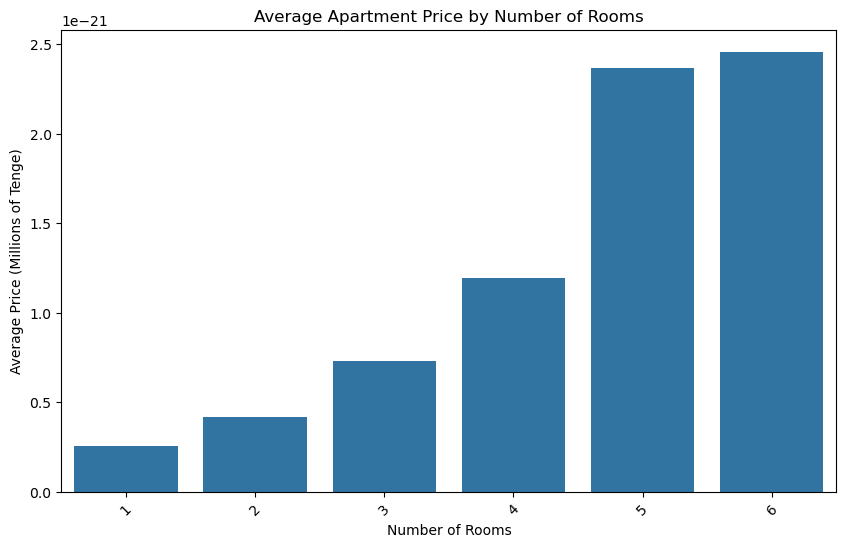

In [49]:
avg_price_by_rooms['Price'] /= 1_000_000

# Plotting the average price for each room category
plt.figure(figsize=(10, 6))
sns.barplot(x='Rooms', y='Price', data=avg_price_by_rooms)
plt.title('Average Apartment Price by Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Average Price (Millions of Tenge)')
plt.xticks(rotation=45)
plt.show()

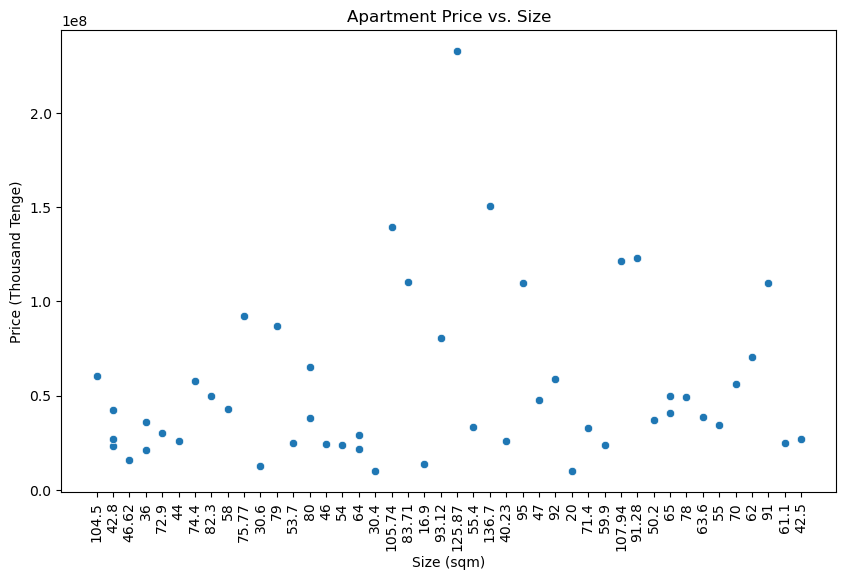

In [63]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Size (sqm)', y='Price', data=df.head(50))
plt.title('Apartment Price vs. Size')
plt.xlabel('Size (sqm)')
plt.xticks(rotation=90) 
plt.ylabel('Price (Thousand Tenge)')
plt.show()

In [80]:
df['Actual Floor'] = df['Floor Info'].str.extract(r'(\d+)/').astype(float)
df = df.dropna(subset=['Actual Floor']) 

df['Actual Floor'] = df['Actual Floor'].astype(int)

# Ensure floors are within the realistic range of 1 to 20
# df = df[(df['Actual Floor'] >= 1) & (df['Actual Floor'] <= 20)]
avg_floor_by_price = df.groupby('Price')['Actual Floor'].mean().reset_index()
avg_floor_by_price['Average Floor'] = avg_floor_by_price['Actual Floor'].round(0).astype(int)


C:\Users\Admin\AppData\Local\Temp\ipykernel_19604\3241723508.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Actual Floor'] = df['Floor Info'].str.extract(r'(\d+)/').astype(float)


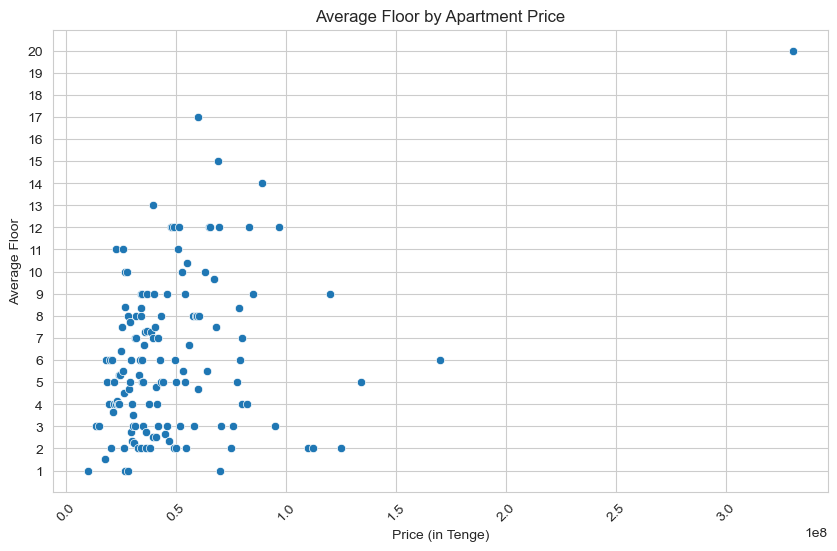

In [82]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Actual Floor', data=avg_floor_by_price)
plt.title('Average Floor by Apartment Price')
plt.xlabel('Price (in Tenge)')
plt.ylabel('Average Floor')
plt.xticks(rotation=45)
plt.yticks(range(1, 21))
plt.show()
